### y = ax^2 + bx + c

### 多项式回归

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x = np.random.uniform(-3, 3, size=100)
X = x.reshape(-1, 1)

In [4]:
y = 0.5 * x**2 + x +2 + np.random.normal(0, 1, size=100)

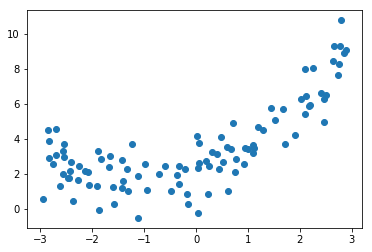

In [5]:
plt.scatter(x,y)
plt.show()

In [7]:
from sklearn.linear_model import LinearRegression

In [8]:
lin_reg = LinearRegression()

In [9]:
lin_reg.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [10]:
y_predict = lin_reg.predict(X)

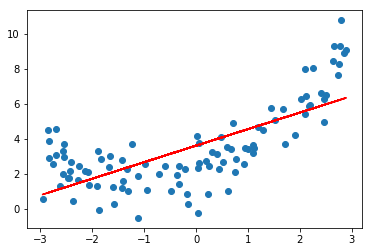

In [11]:
plt.scatter(x, y)
plt.plot(x, y_predict, color='r')
plt.show()

### 解决方案，添加一个特征

In [12]:
(X**2).shape

(100, 1)

In [13]:
X2 = np.hstack([X, X**2])

In [14]:
X2.shape

(100, 2)

In [15]:
lin_reg2 = LinearRegression()
lin_reg2.fit(X2, y)
y_predict2 = lin_reg2.predict(X2)

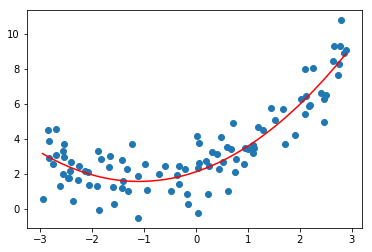

In [17]:
plt.scatter(x, y)
# 要对x进行排序，不然是乱的，折线图
plt.plot(np.sort(x), y_predict2[np.argsort(x)], color='r') 
plt.show()

In [18]:
lin_reg2.coef_

array([1.01074361, 0.46113933])

In [19]:
lin_reg2.intercept_

2.115365460470671

## scikit-learn 中的多项式回归和Pipeline

In [20]:
import numpy as np
import matplotlib.pyplot as plt

In [21]:
x = np.random.uniform(-3, 3, size=100)
X = x.reshape(-1,1)
y = 0.5 * x**2 + x + 2 + np.random.normal(0, 1, 100)

In [22]:
from sklearn.preprocessing import PolynomialFeatures

In [23]:
poly = PolynomialFeatures(degree=2) # 最多几次幂
poly.fit(X)
X2 = poly.transform(X)

In [25]:
X2.shape

(100, 3)

In [26]:
X2[:5, :] # 一次方与二次方

array([[ 1.        ,  2.15702827,  4.65277094],
       [ 1.        , -0.28671287,  0.08220427],
       [ 1.        ,  1.39263246,  1.93942518],
       [ 1.        ,  1.77462174,  3.14928233],
       [ 1.        ,  0.80535252,  0.64859268]])

In [27]:
X[:5, :] # 一次方

array([[ 2.15702827],
       [-0.28671287],
       [ 1.39263246],
       [ 1.77462174],
       [ 0.80535252]])

In [28]:
from sklearn.linear_model import LinearRegression

lin_reg2 = LinearRegression()
lin_reg2.fit(X2, y)
y_predict2 = lin_reg2.predict(X2)

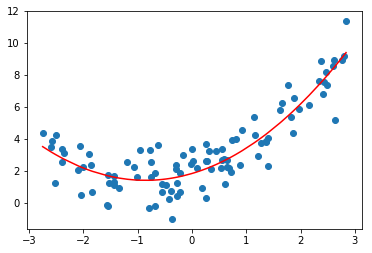

In [29]:
plt.scatter(x, y)
plt.plot(np.sort(x), y_predict2[np.argsort(x)], color='r')
plt.show()

In [31]:
lin_reg2.coef_

array([0.        , 0.99941601, 0.58634173])

### 关于PolynomialFeatures

In [33]:
X = np.arange(1, 11).reshape(-1,2)

In [34]:
X.shape

(5, 2)

In [35]:
X

array([[ 1,  2],
       [ 3,  4],
       [ 5,  6],
       [ 7,  8],
       [ 9, 10]])

In [36]:
poly = PolynomialFeatures(degree=2)

In [37]:
poly.fit(X)
X2 = poly.transform(X)

In [38]:
X2.shape

(5, 6)

In [39]:
X2

array([[  1.,   1.,   2.,   1.,   2.,   4.],
       [  1.,   3.,   4.,   9.,  12.,  16.],
       [  1.,   5.,   6.,  25.,  30.,  36.],
       [  1.,   7.,   8.,  49.,  56.,  64.],
       [  1.,   9.,  10.,  81.,  90., 100.]])

In [40]:
#【x的0次方， X的一次方, X的平方[3列，一个是平方，一个是相乘，还有一个是平方]】

In [41]:
poly = PolynomialFeatures(degree=3)
poly.fit(X)
X3 = poly.transform(X)

In [42]:
X3.shape

(5, 10)

In [43]:
#(1, x1,x2,   x1^2,x2^2,x1x2,  x1^3,x2^3,x1^2*x2,x2^2*x1)

In [44]:
X3

array([[   1.,    1.,    2.,    1.,    2.,    4.,    1.,    2.,    4.,
           8.],
       [   1.,    3.,    4.,    9.,   12.,   16.,   27.,   36.,   48.,
          64.],
       [   1.,    5.,    6.,   25.,   30.,   36.,  125.,  150.,  180.,
         216.],
       [   1.,    7.,    8.,   49.,   56.,   64.,  343.,  392.,  448.,
         512.],
       [   1.,    9.,   10.,   81.,   90.,  100.,  729.,  810.,  900.,
        1000.]])

## Pipeline

In [45]:
x = np.random.uniform(-3, 3, size=100)
X = x.reshape(-1, 1)
y = 0.5 * x**2 + x + 2 + np.random.normal(0,1, 100)

In [48]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

poly_reg = Pipeline([
    ("poly", PolynomialFeatures(degree=2)),
    ("std_scaler", StandardScaler()),
    ("lin_reg", LinearRegression())
])

In [49]:
# sklearn 会非常智能地对X进行处理，再把处理过的X和y传入LineRegression

In [50]:
poly_reg.fit(X, y)
y_predict = poly_reg.predict(X)

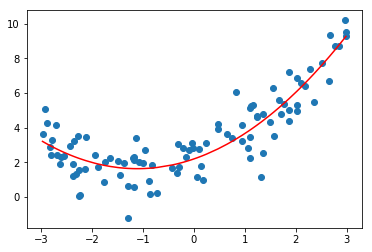

In [51]:
plt.scatter(x, y)
plt.plot(np.sort(x), y_predict[np.argsort(x)], color='r')
plt.show()